In [1]:
from config_figures import *
import re

### Range size dataframe

In [2]:
df = pd.read_csv(google_drive_path + '/' + sdms_area_lat_elev_asset + '.csv').drop(['system:index', '.geo'], axis=1)
df

,area,climate,median_elev,median_lat,min_tree_cover,species
0,9.416606e+11,1981_2010,271.175664,3.628973,0,Abarema_barbouriana
1,8.040583e+11,1981_2010,583.798649,-20.127242,0,Abarema_brachystachya
2,5.791520e+11,1981_2010,46.901477,-2.438856,0,Abarema_cochleata
3,3.037458e+11,1981_2010,251.950137,-12.438020,0,Abarema_filamentosa
4,3.035330e+12,1981_2010,199.640084,2.124966,0,Abarema_jupunba
...,...,...,...,...,...,...
42355,3.847464e+12,1981_2010,179.695740,-0.371729,20,Zygia_latifolia
42356,1.156334e+12,1981_2010,263.569186,5.127434,20,Zygia_longifolia
42357,1.920469e+12,1981_2010,135.565639,0.374240,20,Zygia_racemosa
42358,2.422293e+12,1981_2010,112.160143,-1.373868,20,Zygia_unifoliolata


In [3]:
df[(df['area'] > 7e12) & (df['climate'] == '1981_2010') & (df['median_lat'] < 20)].sort_values('area')

,area,climate,median_elev,median_lat,min_tree_cover,species
3146,7.044742e+12,1981_2010,175.521471,-3.874852,0,Deguelia_amazonica
10571,7.097738e+12,1981_2010,271.994410,10.750594,0,Ziziphus_mauritiana
7972,7.164671e+12,1981_2010,207.257861,-2.246807,0,Pouteria_glomerata
7358,7.224440e+12,1981_2010,303.580975,1.374148,0,Parinari_excelsa
10210,7.380392e+12,1981_2010,463.239807,3.738854,0,Vachellia_nilotica
29914,7.609057e+12,1981_2010,399.924429,3.626835,10,Rourea_minor
41614,7.824427e+12,1981_2010,175.536965,-4.124729,20,Terminalia_grandis
31024,8.199097e+12,1981_2010,175.547608,-4.124865,10,Terminalia_grandis
8734,8.343877e+12,1981_2010,367.989921,4.378008,0,Rourea_minor
3368,8.615820e+12,1981_2010,399.816676,-28.250197,0,Dodonaea_viscosa


In [4]:
# for s in ['Ximenia_americana', 'Terminalia_grandis', 'Rourea_minor', 'Vachellia_nilotica', 'Parinari_excelsa', 'Pouteria_glomerata']:
#     img = sdms.filter(ee.Filter.eq('system:index', s)).first().select('covariates_1981_2010').selfMask()
#     export_image_to_drive(img, 'rangemap_' + s)

### Biome dataframe

In [5]:

biome_names = {
    'Boreal Forests/Taiga': 'Boreal Forests',
    'Mediterranean Forests, Woodlands & Scrub': 'Mediterranean Forests',
    'Temperate Broadleaf & Mixed Forests': 'Temperate Broadleaf Forests', 
    'Temperate Conifer Forests': 'Temperate Conifer Forests',
    'Tropical & Subtropical Coniferous Forests': 'Tropical Coniferous Forests',
    'Tropical & Subtropical Dry Broadleaf Forests': 'Tropical Dry Broadleaf Forests',
    'Tropical & Subtropical Moist Broadleaf Forests': 'Tropical Moist Broadleaf Forests'
}

biome_df = pd.read_csv(google_drive_path + '/' + sdm_biome_drive_filename + '.csv').drop(['system:index', '.geo'], axis=1)
biome_df = pd.melt(biome_df, id_vars=['species'], var_name = 'biome', value_name = 'sdm_frac')
biome_df = biome_df[(biome_df['sdm_frac'] > 20) & (biome_df['biome'].str.contains('Forests'))]
biome_df['biome_name'] = biome_df['biome'].apply(lambda b: biome_names[b])
biome_df

,species,biome,sdm_frac,biome_name
10,Abies_balsamea,Boreal Forests/Taiga,33,Boreal Forests
33,Abies_sibirica,Boreal Forests/Taiga,54,Boreal Forests
639,Alnus_incana,Boreal Forests/Taiga,25,Boreal Forests
693,Amelanchier_bartramiana,Boreal Forests/Taiga,49,Boreal Forests
1281,Betula_cordifolia,Boreal Forests/Taiga,39,Boreal Forests
...,...,...,...,...
148255,Zygia_latifolia,Tropical & Subtropical Moist Broadleaf Forests,78,Tropical Moist Broadleaf Forests
148256,Zygia_longifolia,Tropical & Subtropical Moist Broadleaf Forests,82,Tropical Moist Broadleaf Forests
148257,Zygia_racemosa,Tropical & Subtropical Moist Broadleaf Forests,96,Tropical Moist Broadleaf Forests
148258,Zygia_unifoliolata,Tropical & Subtropical Moist Broadleaf Forests,79,Tropical Moist Broadleaf Forests


### Construct dataframe with range size and range restriction per species with biome attributed to each species

In [6]:
df_pivot = df[df['climate'] == '1981_2010'].pivot(index='species', columns='min_tree_cover', values='area').reset_index()
df_pivot[10] = 100 - (df_pivot[10] / df_pivot[0] * 100)
df_pivot[20] = 100 - (df_pivot[20] / df_pivot[0] * 100)
df_pivot[0] = np.nan
df_range_restriction = df_pivot.melt(id_vars='species', value_vars=[0,10,20], value_name='range_restriction')

df_range_size_restriction = df[df['climate'] == '1981_2010'][['species', 'min_tree_cover', 'area']].merge(df_range_restriction).merge(biome_df[['species', 'biome_name']], how='outer')
df_range_size_restriction['area'] = df_range_size_restriction['area'] / 1e12
df_range_size_restriction['area_log10'] = np.log10(df_range_size_restriction['area'])
df_range_size_restriction

/Users/nina/opt/anaconda3/envs/ee/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,species,min_tree_cover,area,range_restriction,biome_name,area_log10
0,Abarema_barbouriana,0,0.941661,NaN,Tropical Moist Broadleaf Forests,-0.026106
1,Abarema_barbouriana,10,0.919650,2.337460,Tropical Moist Broadleaf Forests,-0.036378
2,Abarema_barbouriana,20,0.904127,3.985863,Tropical Moist Broadleaf Forests,-0.043770
3,Abarema_brachystachya,0,0.804058,NaN,Tropical Moist Broadleaf Forests,-0.094712
4,Abarema_brachystachya,10,0.583012,27.491394,Tropical Moist Broadleaf Forests,-0.234323
...,...,...,...,...,...,...
36835,Zygia_unifoliolata,10,2.536577,10.633767,Tropical Moist Broadleaf Forests,0.404248
36836,Zygia_unifoliolata,20,2.422293,14.660115,Tropical Moist Broadleaf Forests,0.384227
36837,Zygogynum_pancheri,0,0.010756,NaN,Tropical Moist Broadleaf Forests,-1.968337
36838,Zygogynum_pancheri,10,0.010529,2.110478,Tropical Moist Broadleaf Forests,-1.977601


/Users/nina/opt/anaconda3/envs/ee/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mediterranean Forests (1160, 6)
Tropical Coniferous Forests (1176, 6)
Temperate Conifer Forests (356, 6)
Temperate Broadleaf Forests (3488, 6)


/Users/nina/opt/anaconda3/envs/ee/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Tropical Dry Broadleaf Forests (2202, 6)
Tropical Moist Broadleaf Forests (13620, 6)
Boreal Forests (108, 6)


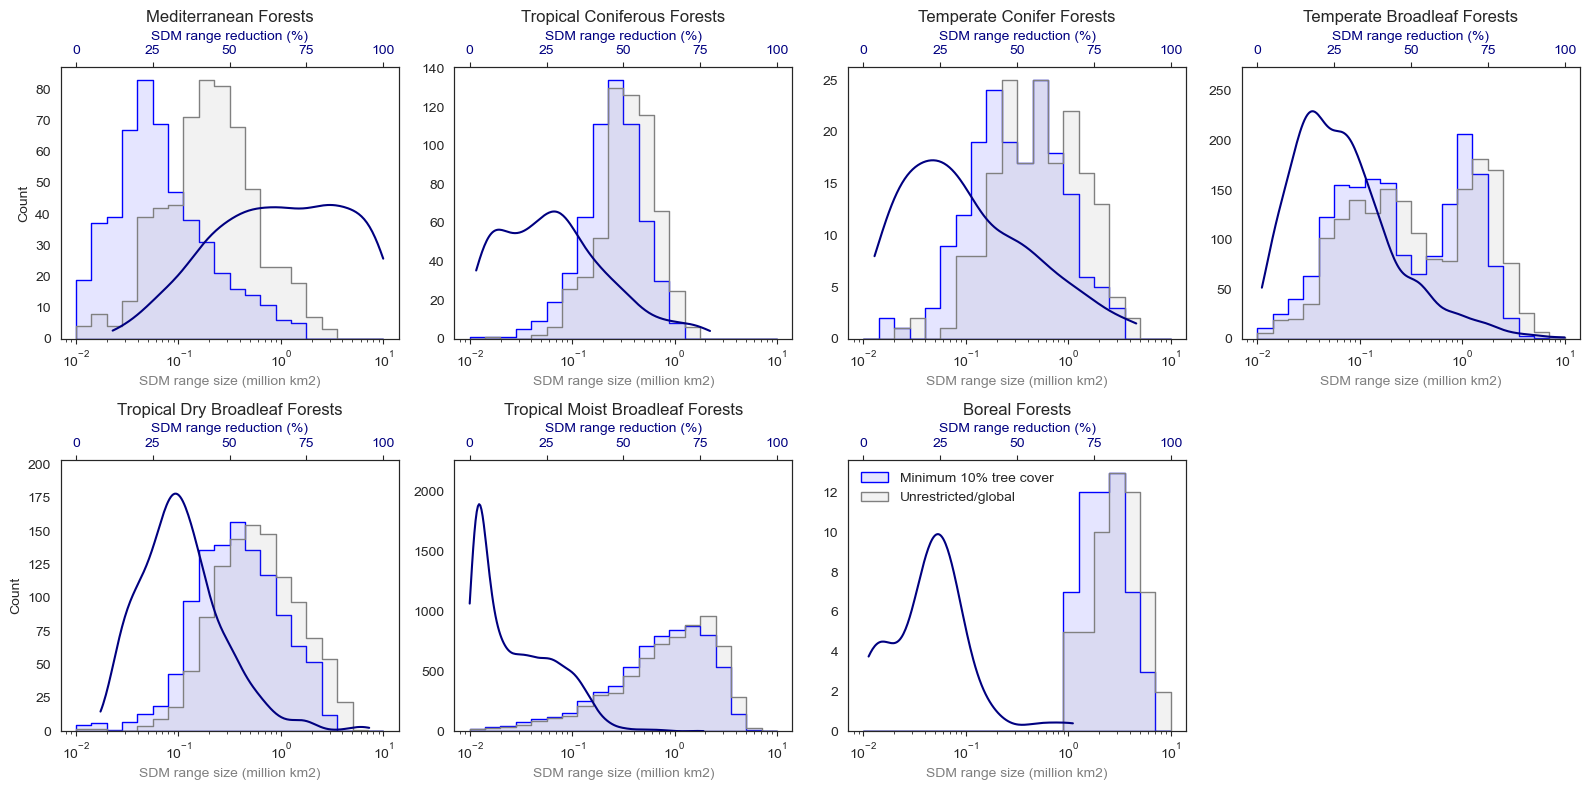

In [7]:
sns.set_style("white")
fig, axs = plt.subplots(2, 4, figsize=(16,8))
biomes = df_range_size_restriction.groupby('biome_name').area.mean().sort_values().index

for ax, biome in zip(axs.flat[0:7], biomes):
    # print(ax, biome)
    df_b = df_range_size_restriction[(df_range_size_restriction.biome_name == biome) & (df_range_size_restriction.min_tree_cover.isin([0, 10]))]
    print(biome, df_b.shape)
    sns.histplot(ax=ax, data=df_b, x='area', hue='min_tree_cover', element="step", log_scale=True, bins=20, binrange=(-2, 1), palette=['grey', 'blue'], alpha=0.1)
    if biome != 'Boreal Forests': ax.get_legend().remove()
    if biome == 'Boreal Forests': ax.legend(labels=['Minimum 10% tree cover', 'Unrestricted/global'], frameon=False, loc="upper left")
    # sns.move_legend(ax, "upper left", frameon=False)

    ax2 = ax.twiny()
    sns.histplot(ax=ax2, data=df_b, x='range_restriction', hue='min_tree_cover', element='step', fill=False, palette=['grey', 'navy'], legend=False, bins=20, binrange=(0,100), kde=True, alpha=0) #common_norm=False, 
    ax2.set_xticks([0, 25, 50, 75, 100])
    ax2.set_xticklabels([0, 25, 50, 75, 100], color='navy')
    
    if biome not in ['Mediterranean Forests', 'Tropical Dry Broadleaf Forests']: ax.set_ylabel(None)
    ax.set_title(biome)
    ax.set_xlabel('SDM range size (million km2)', color='grey')
    ax2.set_xlabel('SDM range reduction (%)', color='navy')

ax8 = axs.flat[7]
#fig.delaxes(ax8) 
ax8.axis('off')

plt.tight_layout()
plt.show()
#plt.savefig('../figures/range_restriction.png')

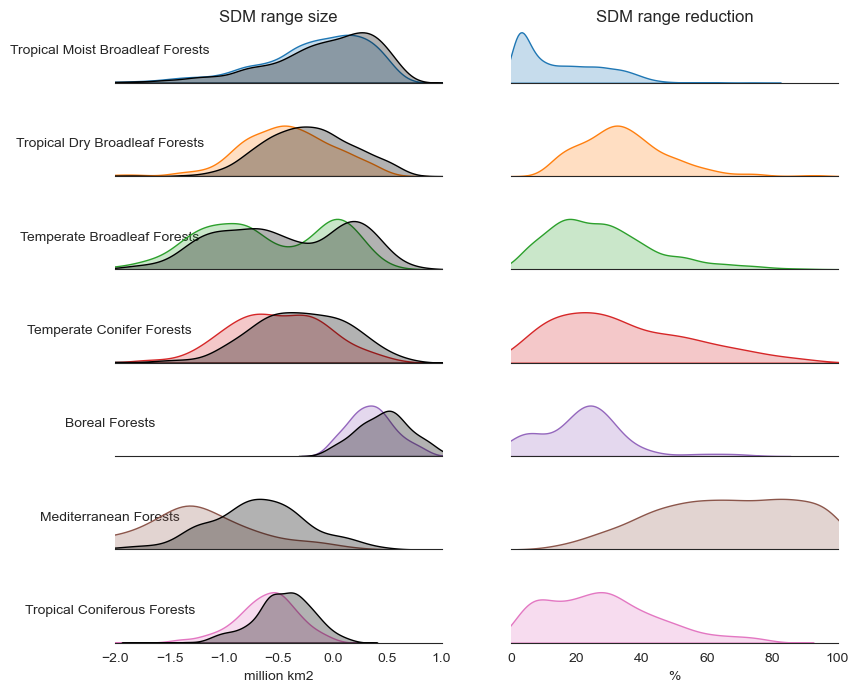

In [119]:
df10_melted = pd.melt(df_range_size_restriction[df_range_size_restriction['min_tree_cover']==10], id_vars=['species', 'biome_name'], value_vars=['area_log10', 'range_restriction'])
g = sns.FacetGrid(df10_melted, row='biome_name', col="variable", hue='biome_name', aspect=4, height=1, sharex='col', sharey=False)
g.map_dataframe(sns.kdeplot, x='value', fill=True)
g.set(yticks=[])#, ylabel="")
g.despine(left=True)

for i, (ax, ax1) in enumerate(g.axes):
    biome = re.search(r'biome_name = (.+) \| variable = area_log10', ax.get_title()).group(1)
    df_ax = df_range_size_restriction[(df_range_size_restriction['biome_name'] == biome) & (df_range_size_restriction['min_tree_cover'] == 0)]
    sns.kdeplot(ax=ax, data=df_ax, x='area_log10', color='black', fill=True, alpha = 0.3)
    ax.set(xlim=(-2, 1), title="")
    ax.set_ylabel(biome, rotation=0)
    ax1.set(xlim=(0,100), title="", ylabel="")
    if i == 0: 
        ax.set(title="SDM range size")
        ax1.set(title="SDM range reduction")
    if i == len(g.axes) -1:
        ax.set(xlabel='million km2')
        ax1.set(xlabel='%')



0 Tropical Moist Broadleaf Forests AxesSubplot(0.125,0.786098;0.352273x0.0939024) AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
1 Tropical Dry Broadleaf Forests AxesSubplot(0.125,0.673415;0.352273x0.0939024) AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
2 Temperate Broadleaf Forests AxesSubplot(0.125,0.560732;0.352273x0.0939024) AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
3 Temperate Conifer Forests AxesSubplot(0.125,0.448049;0.352273x0.0939024) AxesSubplot(0.547727,0.448049;0.352273x0.0939024)
4 Boreal Forests AxesSubplot(0.125,0.335366;0.352273x0.0939024) AxesSubplot(0.547727,0.335366;0.352273x0.0939024)
5 Mediterranean Forests AxesSubplot(0.125,0.222683;0.352273x0.0939024) AxesSubplot(0.547727,0.222683;0.352273x0.0939024)
6 Tropical Coniferous Forests AxesSubplot(0.125,0.11;0.352273x0.0939024) AxesSubplot(0.547727,0.11;0.352273x0.0939024)


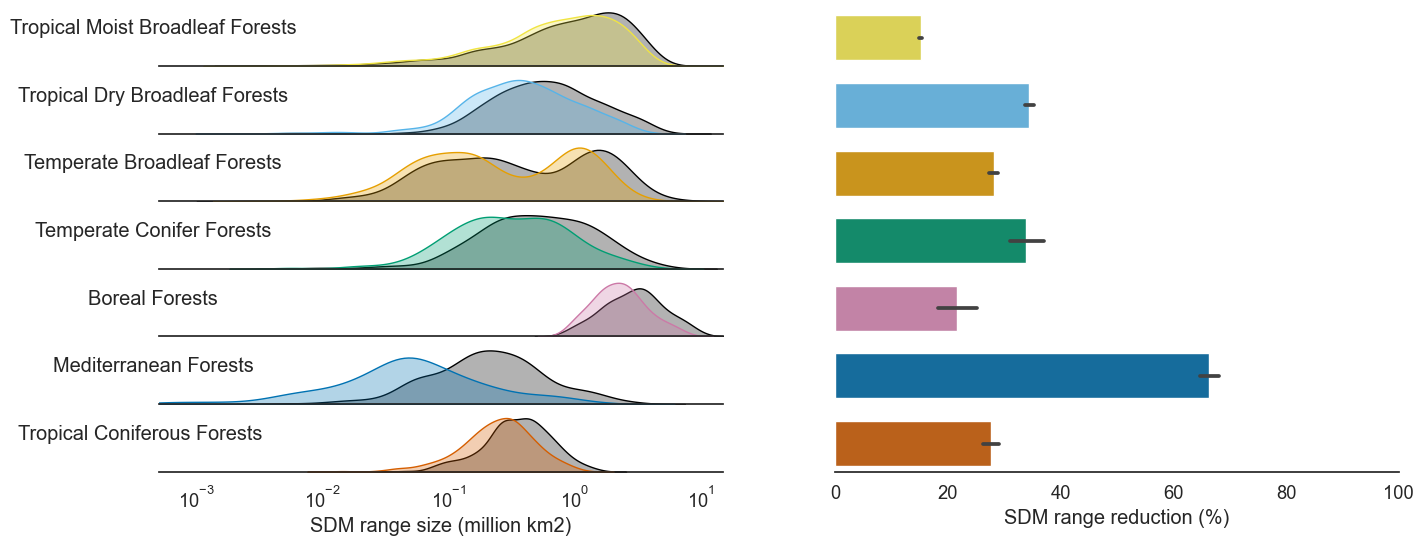

In [31]:
sns.set(style='white', font_scale = 1.2)
fig, axes = plt.subplots(7, 2, figsize=(16, 6))
palette=['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00']

for i, ((ax1, ax2), biome, color) in enumerate(zip(axes, df_range_size_restriction.biome_name.unique(), palette)):
    print(i, biome, ax1, ax2)
    df_biome_0 = df_range_size_restriction[(df_range_size_restriction['biome_name'] == biome) & (df_range_size_restriction['min_tree_cover'] == 0)]
    df_biome_10 = df_range_size_restriction[(df_range_size_restriction['biome_name'] == biome) & (df_range_size_restriction['min_tree_cover'] == 10)]
    sns.kdeplot(ax=ax1, data=df_biome_0[df_biome_0['area'] != 0], x='area', color='black', fill=True, alpha = 0.3, log_scale=True)
    sns.kdeplot(ax=ax1, data=df_biome_10[df_biome_10['area'] != 0], x='area', color=color, fill=True, alpha = 0.3, log_scale=True)
    ax1.set(xlim=(0.0005, 15))
    ax1.set_ylabel(biome, rotation=0)

    sns.barplot(ax=ax2, data=df_biome_10, x='range_restriction', y='biome_name', color=color, errorbar="ci")
    ax2.set(ylabel="", yticklabels="", xlim=(0,100))

    if i != 6: 
        for ax in [ax1, ax2]:
            ax.set(xticks=[], yticks=[], xlabel="")
            for side in ['top', 'bottom', 'right', 'left']:
                if ax==ax1 and side=='bottom': continue
                ax.spines[side].set_visible(False)
    else:
        ax1.set(xlabel="SDM range size (million km2)", yticklabels="")
        ax2.set(xlabel="SDM range reduction (%)")
        for ax in [ax1, ax2]:
            for side in ['top', 'right', 'left']:
                ax.spines[side].set_visible(False)

# plt.tight_layout()
plt.savefig('../figures/range_restriction_alternative.png')

### Statistics on range size restriction per biome 

In [18]:
df_range_size_restriction[df_range_size_restriction['min_tree_cover'] == 10].range_restriction.mean()

26.731167560123342

In [19]:
df_range_size_restriction[df_range_size_restriction['min_tree_cover'].isin([0, 10])].groupby(['biome_name', 'min_tree_cover'])[['area','range_restriction']].mean()

area  range_restriction
biome_name                       min_tree_cover                             
Boreal Forests                   0               3.388158                NaN
                                 10              2.550535          21.684607
Mediterranean Forests            0               0.344243                NaN
                                 10              0.118663          66.278207
Temperate Broadleaf Forests      0               0.820838                NaN
                                 10              0.559782          28.108820
Temperate Conifer Forests        0               0.783532                NaN
                                 10              0.504086          33.821517
Tropical Coniferous Forests      0               0.414505                NaN
                                 10              0.295454          27.620323
Tropical Dry Broadleaf Forests   0               0.889189                NaN
                                 10              0.579334          34.412446
Tropical Moist Broadleaf Forests 0               1.315267                NaN
                                 10              1.105670          15.136642

In [20]:
df_b = df_range_size_restriction[df_range_size_restriction.biome_name == 'Mediterranean Forests']
df_b[df_b['range_restriction'] > 90].shape[0] / df_b.shape[0]

0.14022988505747128

# Figure 2b: SDM range size vs. median latitude

In [4]:
df_area_lat = df[(df['min_tree_cover'] == 10) & (df['climate'] == '1981_2010') & (df['median_lat'] != -999)][['species', 'area', 'median_lat']]
df_area_lat['area'] = df_area_lat['area'] / 1e12
df_area_lat

,species,area,median_lat
21180,Abarema_barbouriana,0.919650,3.628381
21181,Abarema_brachystachya,0.583012,-20.126729
21182,Abarema_cochleata,0.511100,-2.438659
21183,Abarema_filamentosa,0.212112,-12.685654
21184,Abarema_jupunba,2.873850,2.124942
...,...,...,...
31765,Zygia_latifolia,4.073369,-0.629770
31766,Zygia_longifolia,1.218121,5.378197
31767,Zygia_racemosa,1.946435,0.374169
31768,Zygia_unifoliolata,2.536577,-1.126276


In [5]:
values = np.vstack([df_area_lat["area"], df_area_lat["median_lat"]])
kernel = gaussian_kde(values)(values)
kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())

In [6]:
latitudes = np.arange(-55, 65, 1)
mean_area = [df_area_lat[(df['median_lat'] >= lat-2) & (df['median_lat'] < lat+2)]['area'].mean() for lat in latitudes]

/var/folders/r2/w0bwjv2s0wb_c3q5wpnhbv2h0000gp/T/ipykernel_69512/1276557828.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_area = [df_area_lat[(df['median_lat'] >= lat-2) & (df['median_lat'] < lat+2)]['area'].mean() for lat in latitudes]


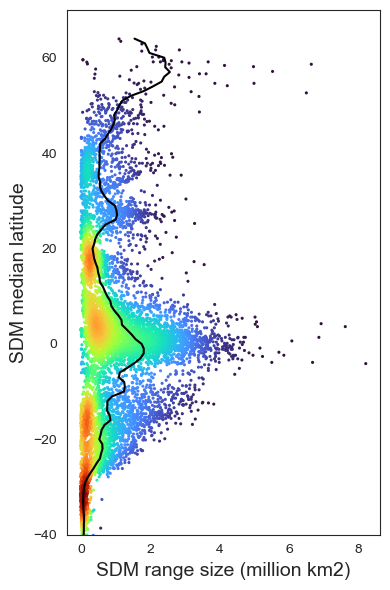

In [7]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(4,6))
sns.scatterplot(ax=ax, data = df_area_lat, x = 'area', y = 'median_lat', hue = kernel_norm, palette = 'turbo', s = 5, edgecolor = 'none', legend=False)
sns.lineplot(ax=ax, x = mean_area, y = latitudes, orient='y', c='k')
ax.set(ylim=(-40, 70))
ax.set_xlabel('SDM range size (million km2)', fontsize=14)
ax.set_ylabel('SDM median latitude', fontsize = 14)
plt.tight_layout()
plt.savefig('../figures/sdm_range_median_lat.png')

# Figure 2c: SDM range size and range restriction per biome

In [5]:
biome_names = {
    'Boreal Forests/Taiga': 'Boreal Forests',
    'Mediterranean Forests, Woodlands & Scrub': 'Mediterranean Forests',
    'Temperate Broadleaf & Mixed Forests': 'Temperate Broadleaf Forests', 
    'Temperate Conifer Forests': 'Temperate Conifer Forests',
    'Tropical & Subtropical Coniferous Forests': 'Tropical Coniferous Forests',
    'Tropical & Subtropical Dry Broadleaf Forests': 'Tropical Dry Broadleaf Forests',
    'Tropical & Subtropical Moist Broadleaf Forests': 'Tropical Moist Broadleaf Forests'
}

In [6]:
biome_df = pd.read_csv(google_drive_path + '/' + sdm_biome_drive_filename + '.csv').drop(['system:index', '.geo'], axis=1)
biome_df = pd.melt(biome_df, id_vars=['species'], var_name = 'biome', value_name = 'sdm_frac')
biome_df = biome_df[(biome_df['sdm_frac'] > 20) & (biome_df['biome'].str.contains('Forests'))]
biome_df['biome_name'] = biome_df['biome'].apply(lambda b: biome_names[b])
biome_df

,species,biome,sdm_frac,biome_name
10,Abies_balsamea,Boreal Forests/Taiga,33,Boreal Forests
33,Abies_sibirica,Boreal Forests/Taiga,54,Boreal Forests
639,Alnus_incana,Boreal Forests/Taiga,25,Boreal Forests
693,Amelanchier_bartramiana,Boreal Forests/Taiga,49,Boreal Forests
1281,Betula_cordifolia,Boreal Forests/Taiga,39,Boreal Forests
...,...,...,...,...
148255,Zygia_latifolia,Tropical & Subtropical Moist Broadleaf Forests,78,Tropical Moist Broadleaf Forests
148256,Zygia_longifolia,Tropical & Subtropical Moist Broadleaf Forests,82,Tropical Moist Broadleaf Forests
148257,Zygia_racemosa,Tropical & Subtropical Moist Broadleaf Forests,96,Tropical Moist Broadleaf Forests
148258,Zygia_unifoliolata,Tropical & Subtropical Moist Broadleaf Forests,79,Tropical Moist Broadleaf Forests


In [7]:
df_pivot = df[df['climate'] == '1981_2010'].pivot(index='species', columns='min_tree_cover', values='area').reset_index()
df_pivot[10] = 100 - (df_pivot[10] / df_pivot[0] * 100)
df_pivot[20] = 100 - (df_pivot[20] / df_pivot[0] * 100)
df_pivot[0] = np.nan
df_range_restriction = df_pivot.melt(id_vars='species', value_vars=[0,10,20], value_name='range_restriction')
df_range_restriction

,species,min_tree_cover,range_restriction
0,Abarema_barbouriana,0,NaN
1,Abarema_brachystachya,0,NaN
2,Abarema_cochleata,0,NaN
3,Abarema_filamentosa,0,NaN
4,Abarema_jupunba,0,NaN
...,...,...,...
31765,Zygia_latifolia,20,15.188499
31766,Zygia_longifolia,20,11.801740
31767,Zygia_racemosa,20,3.884902
31768,Zygia_unifoliolata,20,14.660115


In [8]:
df_range_size_restriction = df[df['climate'] == '1981_2010'][['species', 'min_tree_cover', 'area']].merge(df_range_restriction).merge(biome_df[['species', 'biome_name']], how='outer')
df_range_size_restriction['area'] = df_range_size_restriction['area'] / 1e12
df_range_size_restriction

,species,min_tree_cover,area,range_restriction,biome_name
0,Abarema_barbouriana,0,0.941661,NaN,Tropical Moist Broadleaf Forests
1,Abarema_barbouriana,10,0.919650,2.337460,Tropical Moist Broadleaf Forests
2,Abarema_barbouriana,20,0.904127,3.985863,Tropical Moist Broadleaf Forests
3,Abarema_brachystachya,0,0.804058,NaN,Tropical Moist Broadleaf Forests
4,Abarema_brachystachya,10,0.583012,27.491394,Tropical Moist Broadleaf Forests
...,...,...,...,...,...
36835,Zygia_unifoliolata,10,2.536577,10.633767,Tropical Moist Broadleaf Forests
36836,Zygia_unifoliolata,20,2.422293,14.660115,Tropical Moist Broadleaf Forests
36837,Zygogynum_pancheri,0,0.010756,NaN,Tropical Moist Broadleaf Forests
36838,Zygogynum_pancheri,10,0.010529,2.110478,Tropical Moist Broadleaf Forests


In [9]:
df_range_size_restriction[df_range_size_restriction['min_tree_cover'] == 10].range_restriction.mean()

26.731167560123342

In [10]:
df_range_size_restriction[df_range_size_restriction['min_tree_cover'].isin([0, 10])].groupby(['biome_name', 'min_tree_cover'])[['area','range_restriction']].mean()

area  range_restriction
biome_name                       min_tree_cover                             
Boreal Forests                   0               3.388158                NaN
                                 10              2.550535          21.684607
Mediterranean Forests            0               0.344243                NaN
                                 10              0.118663          66.278207
Temperate Broadleaf Forests      0               0.820838                NaN
                                 10              0.559782          28.108820
Temperate Conifer Forests        0               0.783532                NaN
                                 10              0.504086          33.821517
Tropical Coniferous Forests      0               0.414505                NaN
                                 10              0.295454          27.620323
Tropical Dry Broadleaf Forests   0               0.889189                NaN
                                 10              0.579334          34.412446
Tropical Moist Broadleaf Forests 0               1.315267                NaN
                                 10              1.105670          15.136642

In [13]:
df_b = df_range_size_restriction[df_range_size_restriction.biome_name == 'Mediterranean Forests']
df_b[df_b['range_restriction'] > 90].shape[0] / df_b.shape[0]

0.14022988505747128

In [14]:
from scipy import stats

In [15]:
for b in biomes:
    df_b = df_range_size_restriction[df_range_size_restriction.biome_name == b]
    area_0 = df_b[df_b['min_tree_cover'] == 0].area.values
    area_10 = df_b[df_b['min_tree_cover'] == 10].area.values
    print(len(area_0), len(area_10))

    t, p = stats.ttest_ind(area_0, area_10, alternative='greater')
    print(b, t, p)


NameError: name 'biomes' is not defined

In [ ]:
area_0 = df_range_size_restriction[df_range_size_restriction['min_tree_cover'] == 0].area.values
area_10 = df_range_size_restriction[df_range_size_restriction['min_tree_cover'] == 10].area.values
t, p = stats.ttest_ind(area_0, area_10)
print(p, t)

1.2256777012342158e-97 21.06471368130933


In [ ]:
# df_range_size_restriction['area_norm'] = df_range_size_restriction['area'] /df_range_size_restriction['area'].abs().max() #+ 1e-3
# df_range_size_restriction['range_restriction_norm'] = df_range_size_restriction['range_restriction'] /df_range_size_restriction['range_restriction'].abs().max() #+ 1e-3

Mediterranean Forests (1160, 5)
Tropical Coniferous Forests (1176, 5)
Temperate Conifer Forests (356, 5)
Temperate Broadleaf Forests (3488, 5)


/Users/nina/opt/anaconda3/envs/ee/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nina/opt/anaconda3/envs/ee/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Tropical Dry Broadleaf Forests (2202, 5)
Tropical Moist Broadleaf Forests (13620, 5)
Boreal Forests (108, 5)


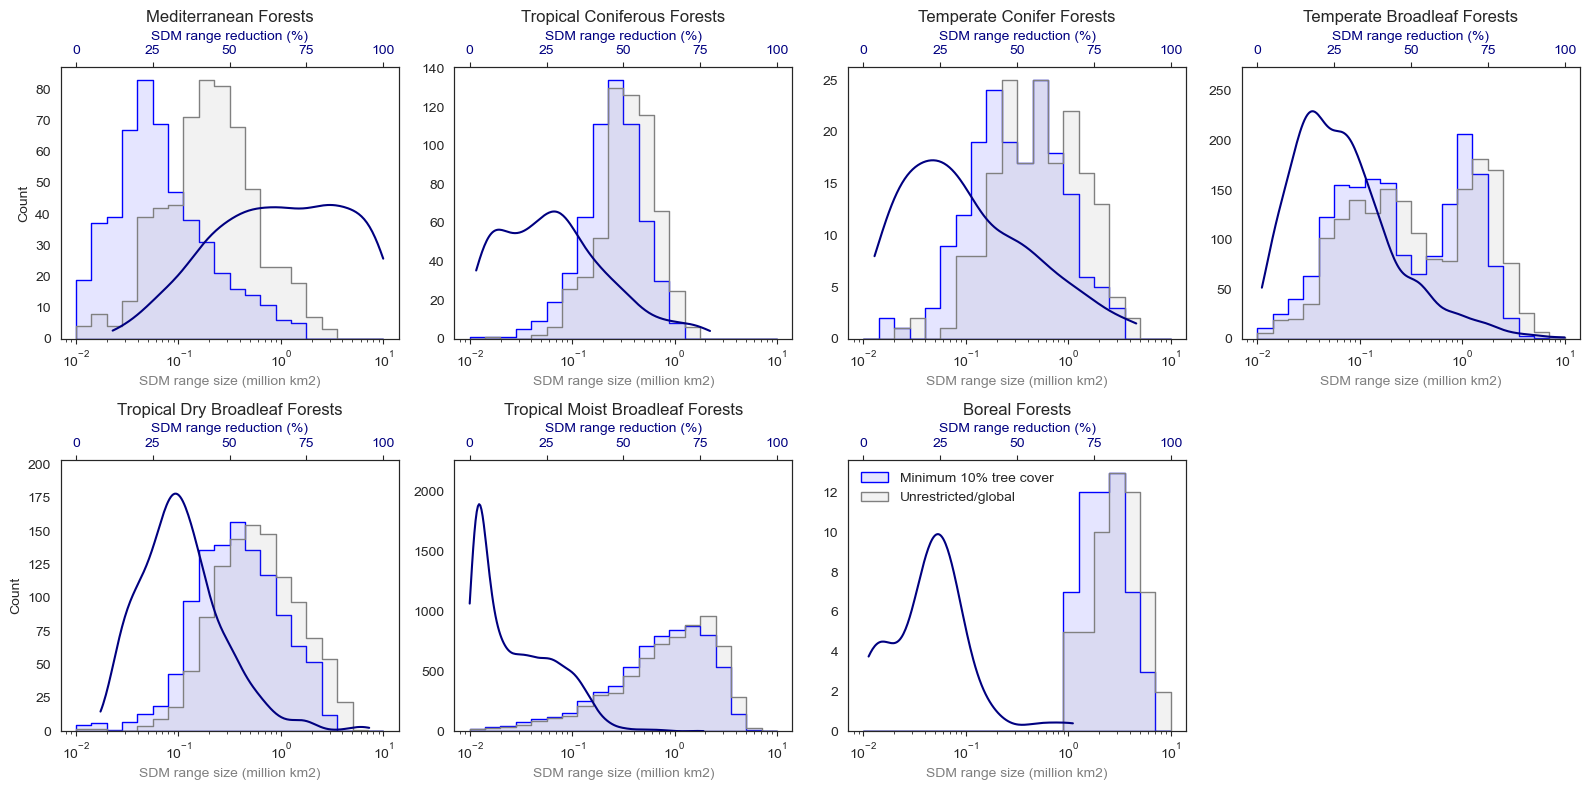

In [24]:
sns.set_style("white")
fig, axs = plt.subplots(2, 4, figsize=(16,8))
biomes = df_range_size_restriction.groupby('biome_name').area.mean().sort_values().index

for ax, biome in zip(axs.flat[0:7], biomes):
    # print(ax, biome)
    df_b = df_range_size_restriction[(df_range_size_restriction.biome_name == biome) & (df_range_size_restriction.min_tree_cover.isin([0, 10]))]
    print(biome, df_b.shape)
    sns.histplot(ax=ax, data=df_b, x='area', hue='min_tree_cover', element="step", log_scale=True, bins=20, binrange=(-2, 1), palette=['grey', 'blue'], alpha=0.1)
    if biome != 'Boreal Forests': ax.get_legend().remove()
    if biome == 'Boreal Forests': ax.legend(labels=['Minimum 10% tree cover', 'Unrestricted/global'], frameon=False, loc="upper left")
    # sns.move_legend(ax, "upper left", frameon=False)

    ax2 = ax.twiny()
    sns.histplot(ax=ax2, data=df_b, x='range_restriction', hue='min_tree_cover', element='step', fill=False, palette=['grey', 'navy'], legend=False, bins=20, binrange=(0,100), kde=True, alpha=0) #common_norm=False, 
    ax2.set_xticks([0, 25, 50, 75, 100])
    ax2.set_xticklabels([0, 25, 50, 75, 100], color='navy')
    
    if biome not in ['Mediterranean Forests', 'Tropical Dry Broadleaf Forests']: ax.set_ylabel(None)
    ax.set_title(biome)
    ax.set_xlabel('SDM range size (million km2)', color='grey')
    ax2.set_xlabel('SDM range reduction (%)', color='navy')

ax8 = axs.flat[7]
#fig.delaxes(ax8) 
ax8.axis('off')

plt.tight_layout()
plt.savefig('../figures/range_restriction.png')